### We read in the data

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = 20, 10
import pandas as pd
import numpy as np


day_hour_count = pd.read_csv("../data/bikeshare_hour_count.csv")
day_hour_count

,hour,monday,tuesday,wednesday,thursday,friday,saturday,sunday
0,0.0,21.0,34.0,43.0,47.0,51.0,89.0,106.0
1,0.1,39.0,22.0,27.0,37.0,56.0,87.0,100.0
2,0.2,31.0,24.0,26.0,42.0,50.0,98.0,77.0
3,0.3,26.0,27.0,25.0,29.0,52.0,99.0,87.0
4,0.4,19.0,24.0,29.0,29.0,50.0,98.0,69.0
...,...,...,...,...,...,...,...,...
235,23.5,36.0,65.0,60.0,94.0,80.0,93.0,28.0
236,23.6,37.0,61.0,66.0,100.0,81.0,95.0,28.0
237,23.7,30.0,42.0,49.0,80.0,101.0,105.0,27.0
238,23.8,33.0,52.0,47.0,79.0,91.0,93.0,24.0


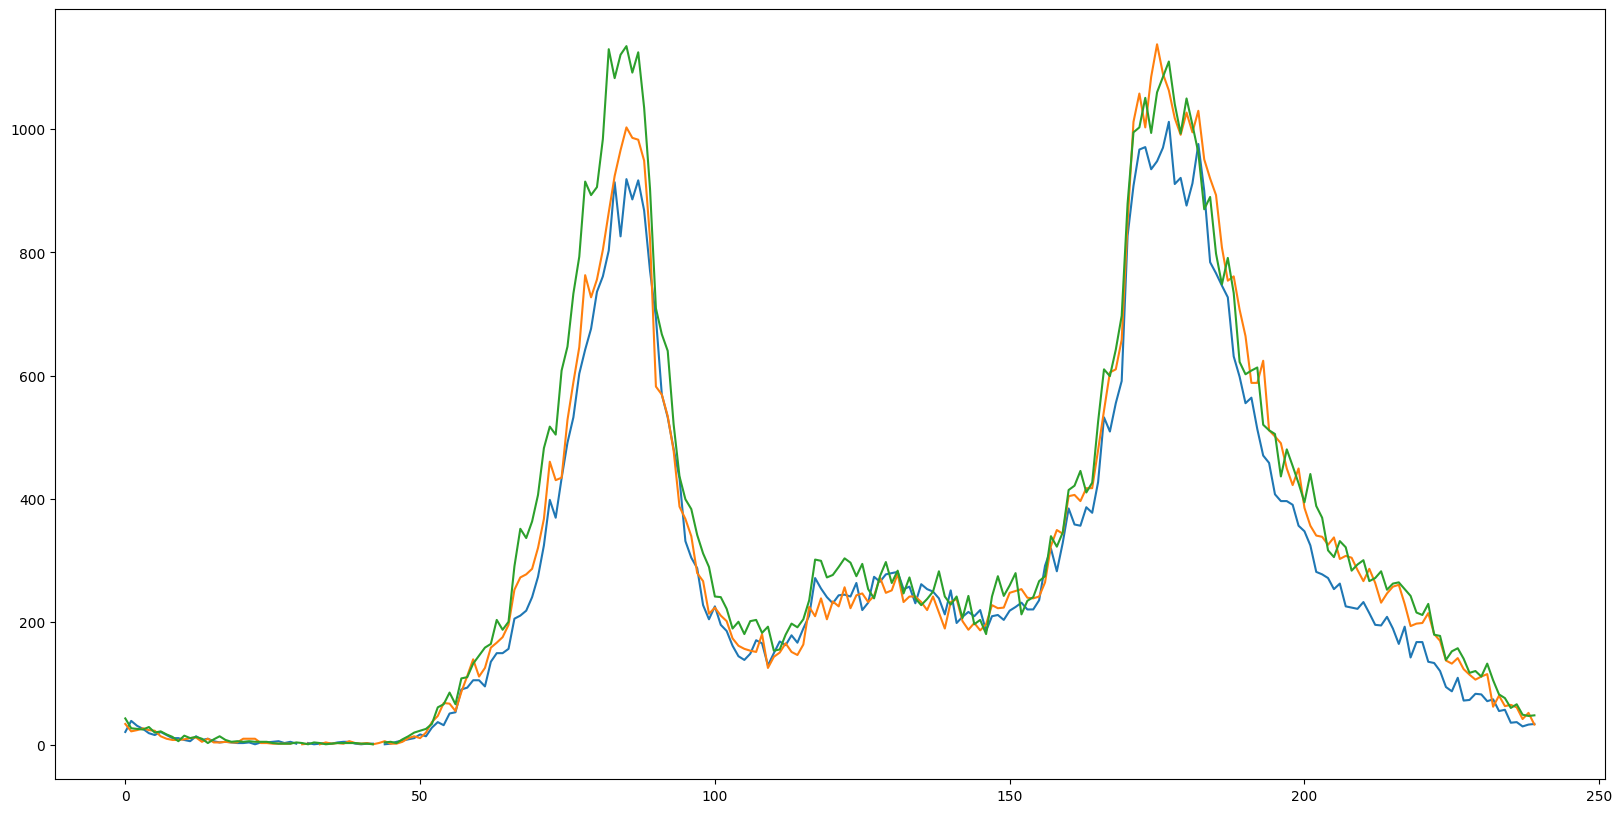

In [2]:
plt.figure(figsize=(20,10))
plt.plot(day_hour_count.index, day_hour_count["monday"])
plt.plot(day_hour_count.index, day_hour_count["tuesday"])
plt.plot(day_hour_count.index, day_hour_count["wednesday"])

# Assignment 4


Explain the results in a **paragraph + charts** of  to describe which model you'd recommend. This means show the data and the model's line on the same chart. The paragraph is a simple justification and comparison of the several models you tried.

# 1. Using the **`day_hour_count`** dataframe create 4 dataframes `monday`, `tuesday`, `saturday` and `sunday` that represent the data for those days. (hint: Monday is day=0)

In [38]:
from sklearn import linear_model, metrics

monday = day_hour_count[["hour","monday"]].copy()
tuesday = day_hour_count[["hour","tuesday"]].copy()
saturday = day_hour_count[["hour","saturday"]].copy()
sunday = day_hour_count[["hour","sunday"]].copy()

In [39]:
monday = monday.dropna()
monday

,hour,monday
0,0.0,21.0
1,0.1,39.0
2,0.2,31.0
3,0.3,26.0
4,0.4,19.0
...,...,...
235,23.5,36.0
236,23.6,37.0
237,23.7,30.0
238,23.8,33.0


In [40]:
tuesday = tuesday.dropna()
tuesday

,hour,tuesday
0,0.0,34.0
1,0.1,22.0
2,0.2,24.0
3,0.3,27.0
4,0.4,24.0
...,...,...
235,23.5,65.0
236,23.6,61.0
237,23.7,42.0
238,23.8,52.0


In [41]:
saturday = saturday.dropna()
saturday

,hour,saturday
0,0.0,89.0
1,0.1,87.0
2,0.2,98.0
3,0.3,99.0
4,0.4,98.0
...,...,...
235,23.5,93.0
236,23.6,95.0
237,23.7,105.0
238,23.8,93.0


In [42]:
sunday = sunday.dropna()
sunday

,hour,sunday
0,0.0,106.0
1,0.1,100.0
2,0.2,77.0
3,0.3,87.0
4,0.4,69.0
...,...,...
235,23.5,28.0
236,23.6,28.0
237,23.7,27.0
238,23.8,24.0



## 2a. Create 3 models fit to (`x=hour`, `y=monday`)  with varying polynomial degrees ( choose from `n=5,15,20`). (Repeat for `saturday` below)

## Plot all the results for each polynomial.

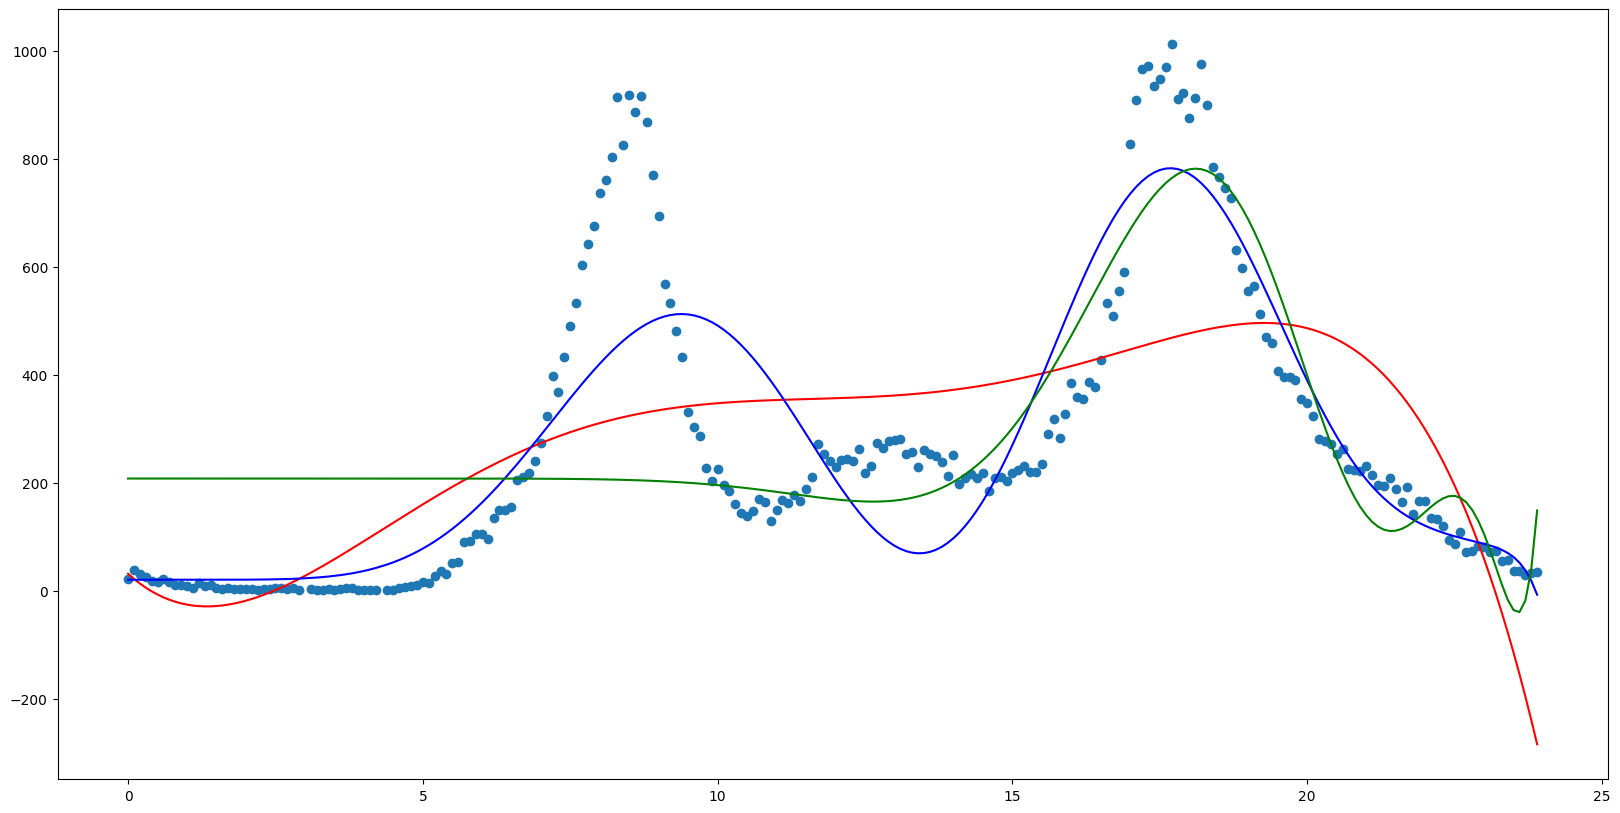

In [48]:
from sklearn.preprocessing import PolynomialFeatures
#monday x and y
hour = monday['hour'].to_numpy()
mon_y = monday['monday'].to_numpy()

hour = hour.reshape(-1,1)
mon_y = mon_y.reshape(-1, 1)

#5 degrees model
poly5 = PolynomialFeatures(degree=5)
hour_5 = poly5.fit_transform(hour)

mon5 = linear_model.LinearRegression()
mon5.fit(hour_5, mon_y)

#15 degree model
poly15 = PolynomialFeatures(degree=15)
hour_15 = poly15.fit_transform(hour)

mon15 = linear_model.LinearRegression()
mon15.fit(hour_15, mon_y)

#20 degree model
poly20 = PolynomialFeatures(degree=20)
hour_20 = poly20.fit_transform(hour)

mon20 = linear_model.LinearRegression()
mon20.fit(hour_20, mon_y)

plt.scatter(hour, mon_y)
plt.plot(hour, mon5.predict(hour_5), c='r')
plt.plot(hour, mon15.predict(hour_15), c='b')
plt.plot(hour, mon20.predict(hour_20), c='g')

For monday models, the blue line fits best and will likely result in the best predictions. The blue line is associated with the 15 degree polynomial. It most closely matches the peaks and valleys of the true data set (blue dots) and is the least divergent at the end of the dataset.

## 2b. Repeat `2a` for `saturday`

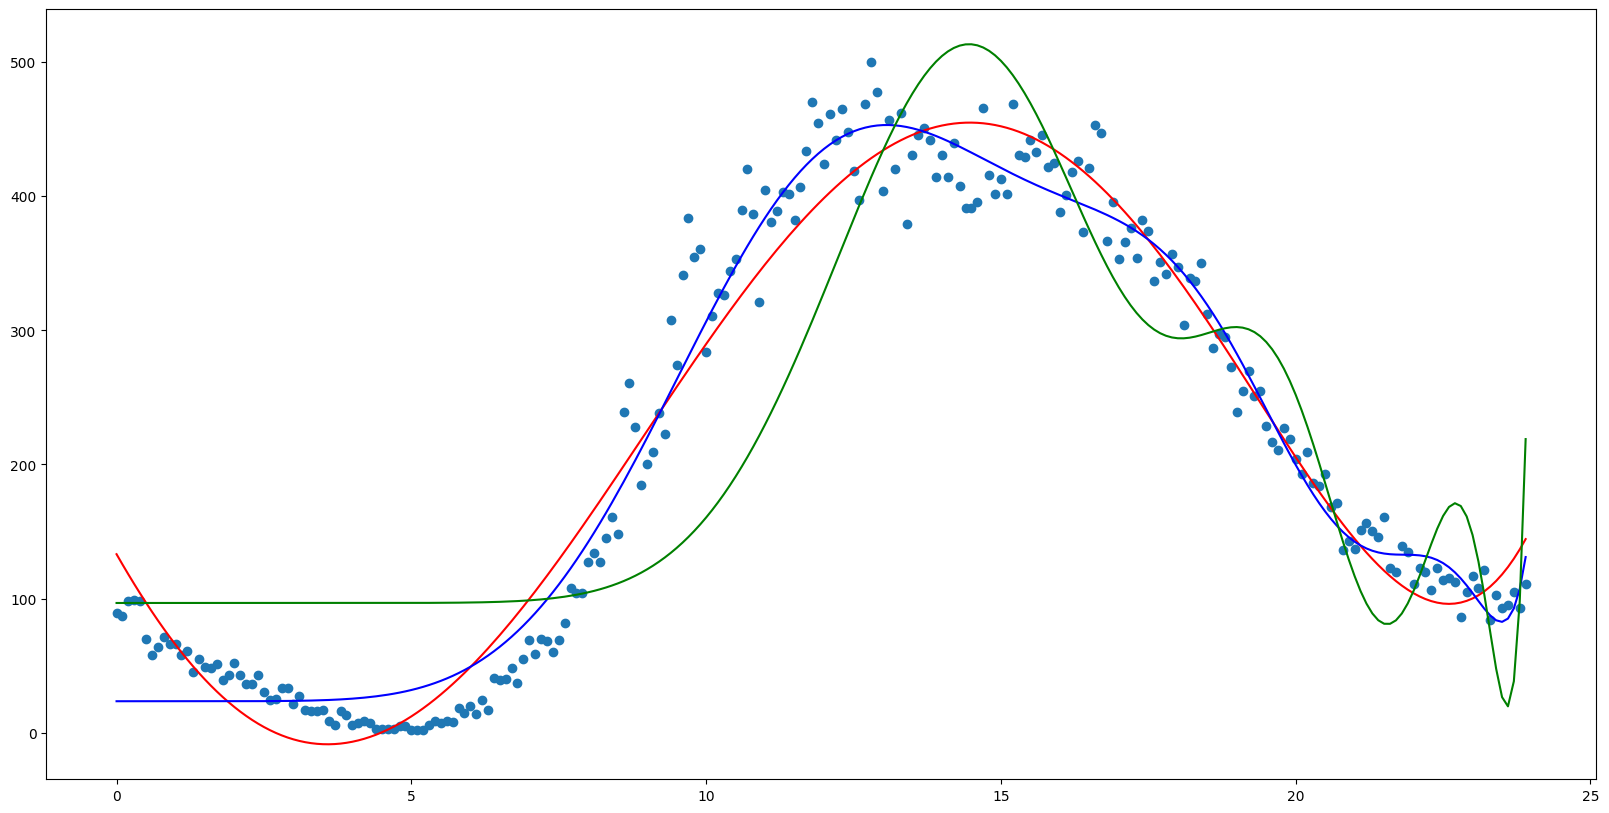

In [49]:
#saturday x and y
sat_hour = saturday['hour'].to_numpy()
sat_y = saturday['saturday'].to_numpy()

sat_hour = sat_hour.reshape(-1,1)
sat_y = sat_y.reshape(-1, 1)

#5 degrees model
poly5 = PolynomialFeatures(degree=5)
sat_hour_5 = poly5.fit_transform(sat_hour)

sat5 = linear_model.LinearRegression()
sat5.fit(sat_hour_5, sat_y)

#15 degree model
poly15 = PolynomialFeatures(degree=15)
sat_hour_15 = poly15.fit_transform(sat_hour)

sat15 = linear_model.LinearRegression()
sat15.fit(sat_hour_15, sat_y)

#20 degree model
poly20 = PolynomialFeatures(degree=20)
sat_hour_20 = poly20.fit_transform(sat_hour)

sat20 = linear_model.LinearRegression()
sat20.fit(sat_hour_20, sat_y)

plt.scatter(sat_hour, sat_y)
plt.plot(sat_hour, sat5.predict(sat_hour_5), c='r')
plt.plot(sat_hour, sat15.predict(sat_hour_15), c='b')
plt.plot(sat_hour, sat20.predict(sat_hour_20), c='g')

For saturday models, I would suggest that the red line fits best and will likely result in the best predictions. The red line is associated with the 5 degree polynomial. It most closely matches the peak and structure of the data (blue dots), and is least divergent at the beginning and end of the model.

## 3. Using the best `monday` model's prediction, determine the errors (MSE, MAE, MAPE) between the prediction with the `monday` and `tuesday` datasets

In [56]:
#Monday/Tuesday
(
    metrics.mean_squared_error(tuesday['tuesday'], mon15.predict(hour_15)),
    metrics.mean_absolute_error(tuesday['tuesday'], mon15.predict(hour_15)),
    metrics.mean_absolute_percentage_error(tuesday['tuesday'], mon15.predict(hour_15))
)

(23858.845843902407, 105.85713547365751, 1.8661090072431024)

## Repeat for `saturday`/`sunday`

In [57]:
#Saturday/Sunday
(
    metrics.mean_squared_error(sunday['sunday'], sat5.predict(sat_hour_5)),
    metrics.mean_absolute_error(sunday['sunday'], sat5.predict(sat_hour_5)),
    metrics.mean_absolute_percentage_error(sunday['sunday'], sat5.predict(sat_hour_5))
)

(1751.9785641545625, 33.091799435094345, 0.7723154684747475)

## 4. With `saturday`, use `train_test_split` to create training and test sets and build a model. Create predictions using the xtest from and determine the errors between these predictions and the ytest (MSE, MAE, MAPE).


In [58]:
from sklearn.model_selection import train_test_split

satxtrain, satxtest, satytrain, satytest = train_test_split(sat_hour, sat_y, test_size=0.2)

sat_linear = linear_model.LinearRegression().fit(satxtrain, satytrain)

In [59]:
satxtrain2 = PolynomialFeatures(degree=2).fit_transform(satxtrain)
satxtest2 = PolynomialFeatures(degree=2).fit_transform(satxtest)

sat_linear2 = linear_model.LinearRegression().fit(satxtrain2, satytrain)

In [61]:
satxtrain10 = PolynomialFeatures(degree=10).fit_transform(satxtrain)
satxtest10 = PolynomialFeatures(degree=10).fit_transform(satxtest)

sat_linear10 = linear_model.LinearRegression().fit(satxtrain10, satytrain)

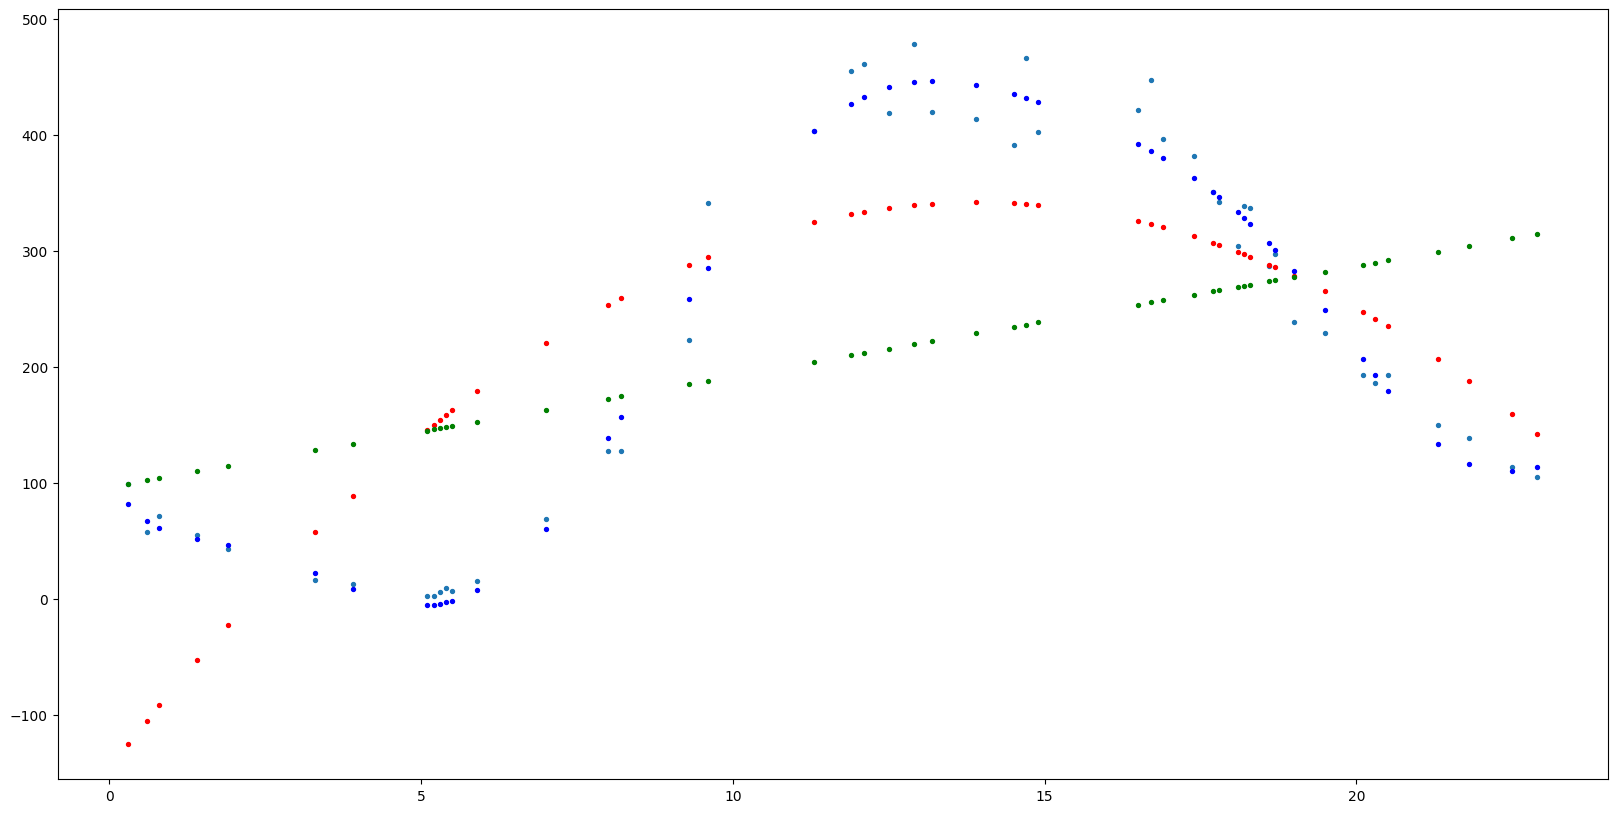

In [63]:
size = 8
plt.scatter(satxtest, satytest, s=size)
plt.scatter(satxtest, sat_linear2.predict(satxtest2), c='r', s=size)
plt.scatter(satxtest, sat_linear10.predict(satxtest10), c='b', s=size)
plt.scatter(satxtest, sat_linear.predict(satxtest), c='g', s=size)

Visually, it appears that the dark blue dots (10th degree polynomial prediction) matches most closely with the test day (light blue dots). 

### MSE

In [64]:
(
    metrics.mean_squared_error(satytest, sat_linear10.predict(satxtest10)), 
    metrics.mean_squared_error(satytest, sat_linear.predict(satxtest)),
    metrics.mean_squared_error(satytest, sat_linear2.predict(satxtest2))
)

(530.1249554605663, 19413.753998097407, 10133.504863254848)

### MAE

In [65]:
(
    metrics.mean_absolute_error(satytest, sat_linear10.predict(satxtest10)), 
    metrics.mean_absolute_error(satytest, sat_linear.predict(satxtest)),
    metrics.mean_absolute_error(satytest, sat_linear2.predict(satxtest2))
)

(18.29219320583056, 121.77567976450327, 86.90591745330808)

### MAPE

In [66]:
(
    metrics.mean_absolute_percentage_error(satytest, sat_linear10.predict(satxtest10)), 
    metrics.mean_absolute_percentage_error(satytest, sat_linear.predict(satxtest)),
    metrics.mean_absolute_percentage_error(satytest, sat_linear2.predict(satxtest2))
)

(0.33673643264347214, 5.209212283096165, 5.214375062063133)

The 10th degree polynomial prediction model has the lowest associated MSE, MAE, and MAPE, confirming that it is the best predictor of the data (of those models created). 

## repeat for `monday`

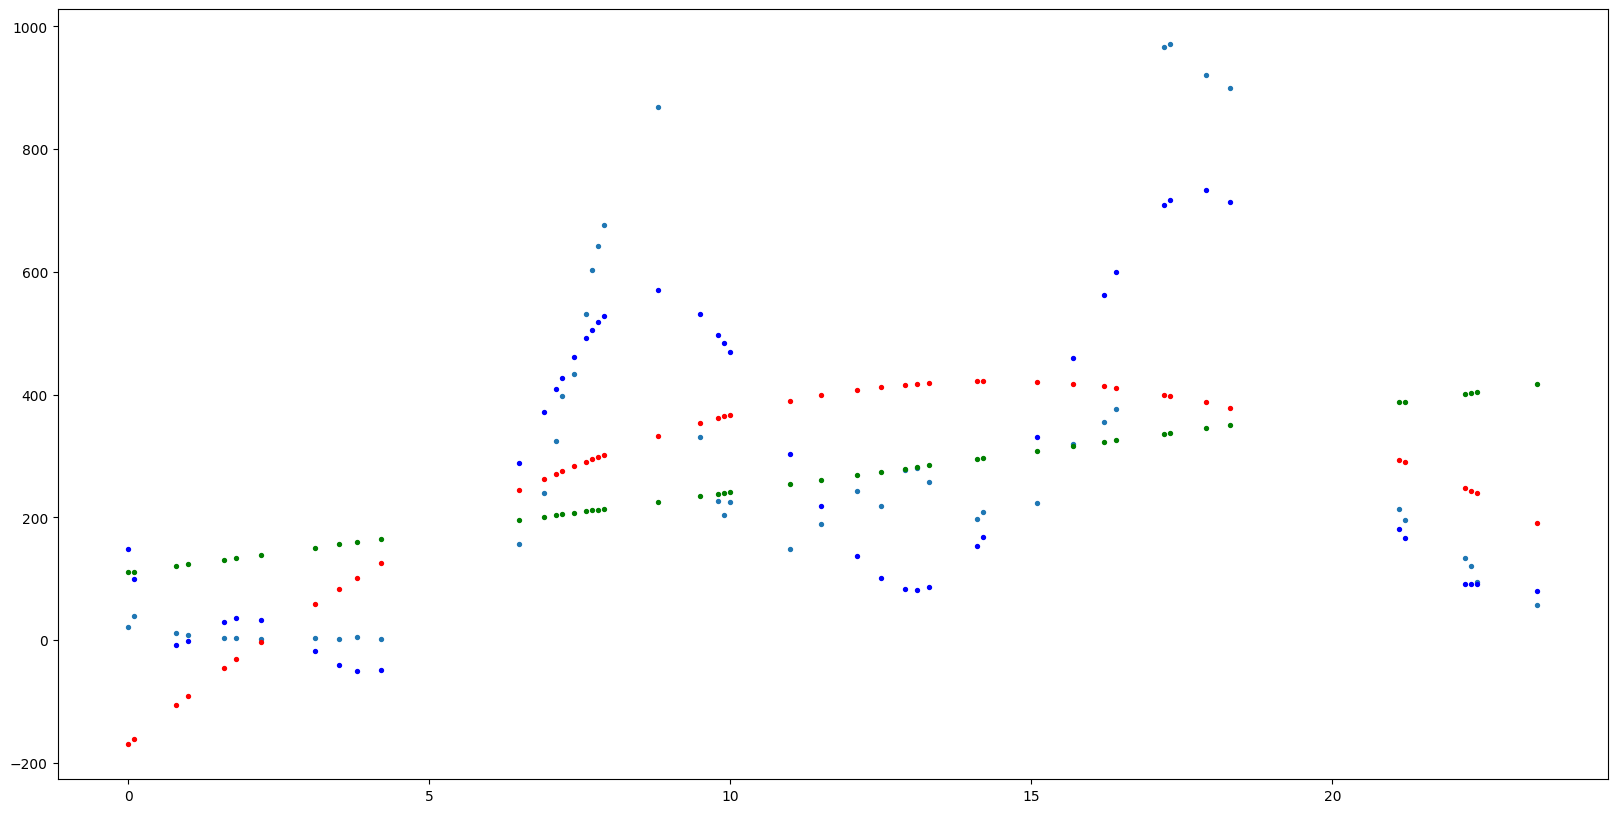

In [67]:
monxtrain, monxtest, monytrain, monytest = train_test_split(hour, mon_y, test_size=0.2)
#lin model
mon_linear = linear_model.LinearRegression().fit(monxtrain, monytrain)

#lin2 model
monxtrain2 = PolynomialFeatures(degree=2).fit_transform(monxtrain)
monxtest2 = PolynomialFeatures(degree=2).fit_transform(monxtest)

mon_linear2 = linear_model.LinearRegression().fit(monxtrain2, monytrain)

#lin10 model
monxtrain10 = PolynomialFeatures(degree=10).fit_transform(monxtrain)
monxtest10 = PolynomialFeatures(degree=10).fit_transform(monxtest)

mon_linear10 = linear_model.LinearRegression().fit(monxtrain10, monytrain)

#plot
size = 8
plt.scatter(monxtest, monytest, s=size)
plt.scatter(monxtest, mon_linear2.predict(monxtest2), c='r', s=size)
plt.scatter(monxtest, mon_linear10.predict(monxtest10), c='b', s=size)
plt.scatter(monxtest, mon_linear.predict(monxtest), c='g', s=size)

Based on the visual it appears that the blue line (10th polynomial) most closely matches the light blue dots (test data)

### MSE

In [68]:
(
    metrics.mean_squared_error(monytest, mon_linear10.predict(monxtest10)), 
    metrics.mean_squared_error(monytest, mon_linear.predict(monxtest)),
    metrics.mean_squared_error(monytest, mon_linear2.predict(monxtest2))
)

(19823.372182464092, 68745.79350725446, 54538.47729513814)

### MAE

In [69]:
(
    metrics.mean_absolute_error(monytest, mon_linear10.predict(monxtest10)), 
    metrics.mean_absolute_error(monytest, mon_linear.predict(monxtest)),
    metrics.mean_absolute_error(monytest, mon_linear2.predict(monxtest2))
)

(111.68455169567422, 188.65005674130293, 181.4937312543484)

### MAPE

In [70]:
(
    metrics.mean_absolute_percentage_error(monytest, mon_linear10.predict(monxtest10)), 
    metrics.mean_absolute_percentage_error(monytest, mon_linear.predict(monxtest)),
    metrics.mean_absolute_percentage_error(monytest, mon_linear2.predict(monxtest2))
)

(2.865742292215149, 10.389987506901003, 4.7209585817993505)

The Linear10 model has the lowest MSE, MAE, and MAPE, confirming that the 10th degree polynomial model is the best predictive model (of those created) for this test data. 